In [2]:
import os
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50
path = kagglehub.dataset_download("fuyadhasanbhoyan/knee-osteoarthritis-classification-224224")

classification_folder = os.path.join(path, 'Knee Osteoarthritis Classification')
train_path = os.path.join(classification_folder, 'train')
val_path = os.path.join(classification_folder, 'val')
test_path = os.path.join(classification_folder, 'test')

print(f"Train path: {train_path}")
print(f"Validation path: {val_path}")
print(f"Test path: {test_path}")





Train path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/train
Validation path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/val
Test path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/test


In [3]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3780 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.
Found 540 images belonging to 3 classes.


In [ ]:
base_model= VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])


model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)




history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=60,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

model_name=VGG16

model.save(f"/content/{model_name}_KneeOsteo_DeepModel.keras")
print(f"{model_name} training complete! Model saved.")



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'{model_name} - Training & Validation Loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'{model_name} - Training & Validation Accuracy')

plt.show()



test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))





cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print(f"Loading {model_name} model...")
loaded_model = tf.keras.models.load_model(f"/content/{model_name}_KneeOsteo_DeepModel.keras")
print(f"\nLoaded {model_name} Model Architecture:")
loaded_model.summary()



80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training VGG19 model...
Epoch 1/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 39s 305ms/step - accuracy: 0.4150 - loss: 1.1238 - val_accuracy: 0.5472 - val_loss: 0.9653
Epoch 2/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 259ms/step - accuracy: 0.5386 - loss: 0.9337 - val_accuracy: 0.5917 - val_loss: 0.9257
Epoch 3/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 257ms/step - accuracy: 0.5804 - loss: 0.8771 - val_accuracy: 0.6000 - val_loss: 0.8987
Epoch 4/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 259ms/step - accuracy: 0.6090 - loss: 0.8383 - val_accuracy: 0.6269 - val_loss: 0.8808
Epoch 5/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 258ms/step - accuracy: 0.6135 - loss: 0.8370 - val_accuracy: 0.5806 - val_loss: 0.8872
Epoch 6/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 259ms/step - accuracy: 0.6222 - loss: 0.8129 - val_accuracy: 0.5435 - val_loss: 0.9207
Epoch 7/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 34s 288ms/step - accuracy: 0.6241 - loss: 0.8150 - val_accuracy: 0.6222 - val_loss: 0.8501
Epoch 8/

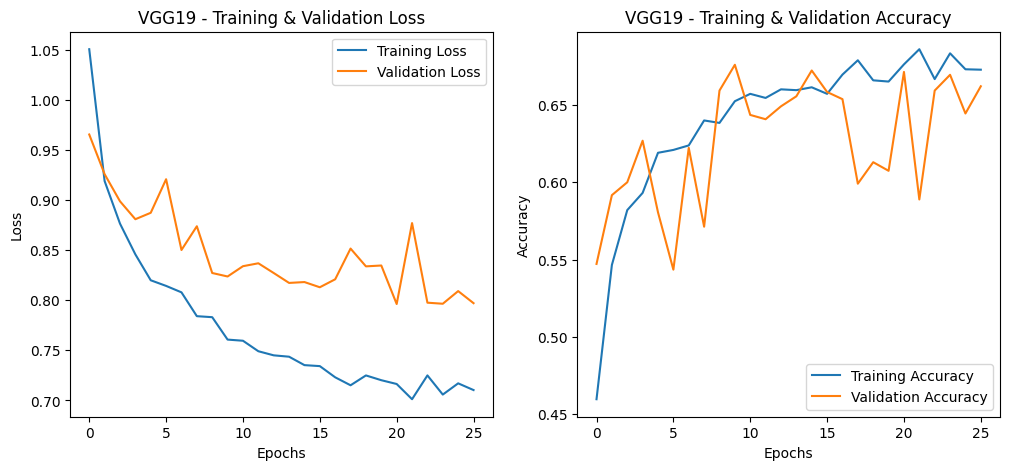

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.5079 - loss: 0.9089
Test Accuracy: 0.69
Test Loss: 0.70
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step
Classification Report:

              precision    recall  f1-score   support

      Normal       0.92      0.43      0.59       180
  Osteopenia       0.76      0.83      0.79       180
Osteoporosis       0.56      0.80      0.66       180

    accuracy                           0.69       540
   macro avg       0.75      0.69      0.68       540
weighted avg       0.75      0.69      0.68       540



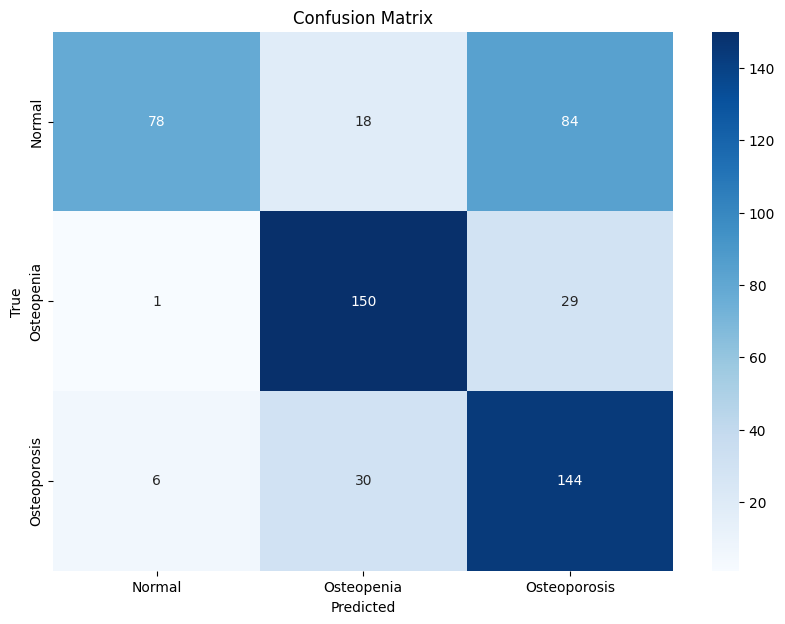

Loading VGG19 model...

Loaded VGG19 Model Architecture:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,420,683 (77.90 MB)

 Trainable params: 132,099 (516.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 264,200 (1.01 MB)

Training InceptionV3 model...
Epoch 1/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 204ms/step - accuracy: 0.5029 - loss: 1.3137 - val_accuracy: 0.5787 - val_loss: 0.8685
Epoch 2/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.6208 - loss: 0.8122 - val_accuracy: 0.6306 - val_loss: 0.8916
Epoch 3/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.6348 - loss: 0.7949 - val_accuracy: 0.5583 - val_loss: 0.9213
Epoch 4/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.6418 - loss: 0.7542 - val_accuracy: 0.6389 - val_loss: 0.8447
Epoch 5/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.6688 - loss: 0.7220 - val_accuracy: 0.5981 - val_loss: 0.8675
Epoch 6/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.6899 - loss: 0.6764 - val_accuracy: 0.6111 - val_loss: 0.8327
Epoch 7/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.6707 - loss: 0.7085 - val_accuracy: 0.6269 - val_loss: 0.8131
Epoch 8/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - acc

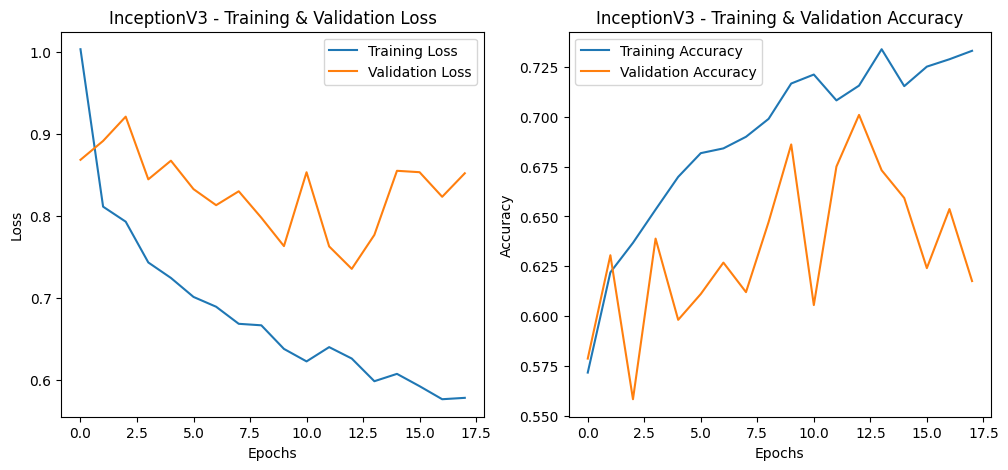

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 486ms/step - accuracy: 0.6246 - loss: 0.7818
Test Accuracy: 0.73
Test Loss: 0.64
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 446ms/step
Classification Report:

              precision    recall  f1-score   support

      Normal       0.82      0.58      0.68       180
  Osteopenia       0.71      0.93      0.81       180
Osteoporosis       0.68      0.67      0.68       180

    accuracy                           0.73       540
   macro avg       0.74      0.73      0.72       540
weighted avg       0.74      0.73      0.72       540



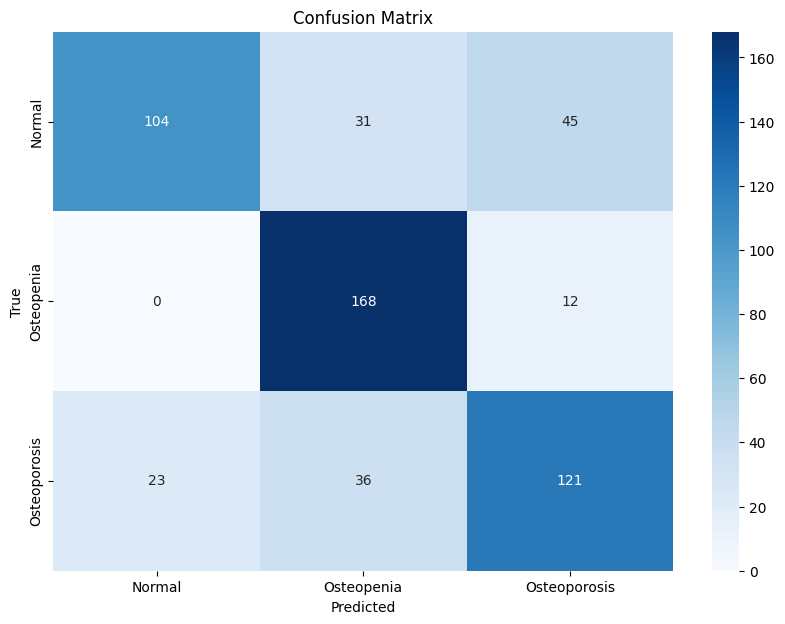

Loading InceptionV3 model...

Loaded InceptionV3 Model Architecture:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,378,731 (89.18 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 1,050,632 (4.01 MB)

Training ResNet50 model...
Epoch 1/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 211ms/step - accuracy: 0.3554 - loss: 1.2249 - val_accuracy: 0.4426 - val_loss: 1.0731
Epoch 2/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.4139 - loss: 1.0778 - val_accuracy: 0.4157 - val_loss: 1.0622
Epoch 3/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.4398 - loss: 1.0624 - val_accuracy: 0.4250 - val_loss: 1.0510
Epoch 4/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.4360 - loss: 1.0583 - val_accuracy: 0.4102 - val_loss: 1.0399
Epoch 5/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.4682 - loss: 1.0383 - val_accuracy: 0.5648 - val_loss: 1.0042
Epoch 6/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.4519 - loss: 1.0256 - val_accuracy: 0.5657 - val_loss: 0.9890
Epoch 7/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.4842 - loss: 1.0072 - val_accuracy: 0.4639 - val_loss: 1.0122
Epoch 8/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step -

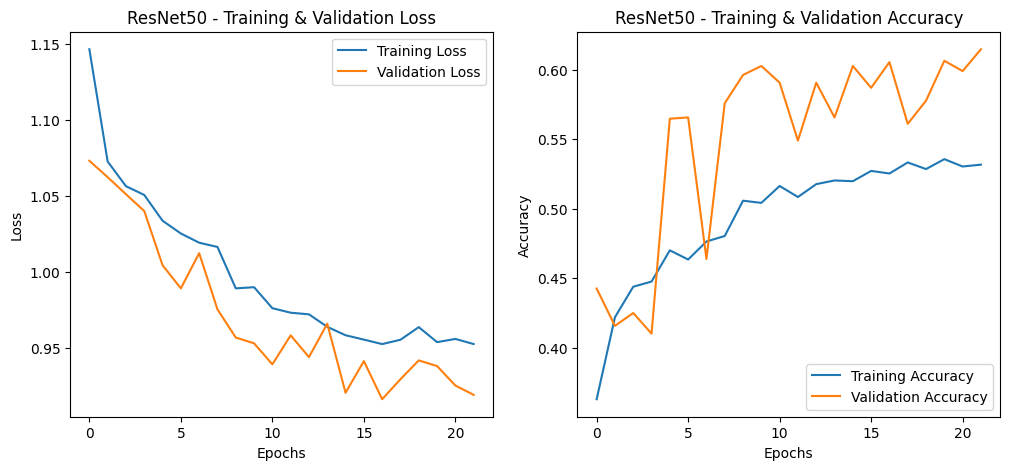

17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - accuracy: 0.4437 - loss: 0.8784
Test Accuracy: 0.61
Test Loss: 0.84
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 294ms/step
Classification Report:

              precision    recall  f1-score   support

      Normal       0.69      0.36      0.47       180
  Osteopenia       0.73      0.74      0.74       180
Osteoporosis       0.50      0.74      0.60       180

    accuracy                           0.61       540
   macro avg       0.64      0.61      0.60       540
weighted avg       0.64      0.61      0.60       540



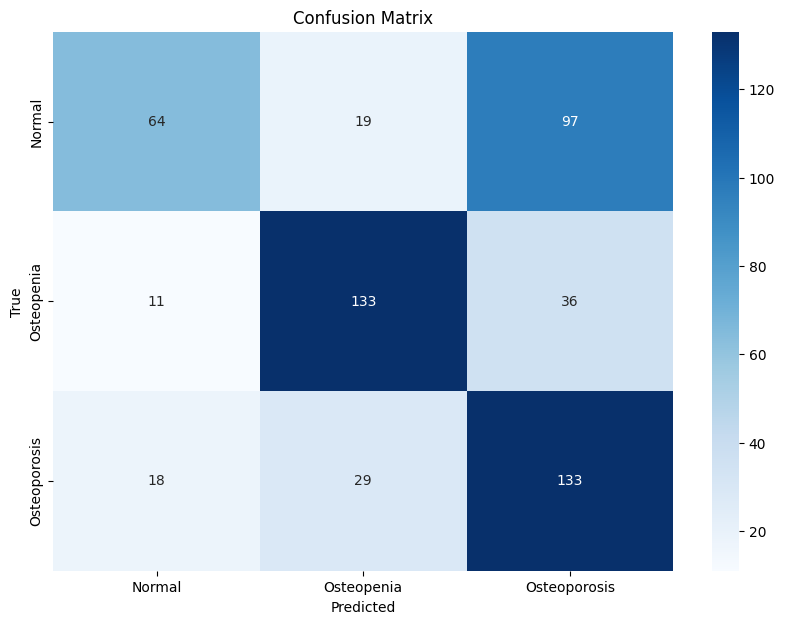

Loading ResNet50 model...

Loaded ResNet50 Model Architecture:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,163,659 (95.99 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 1,050,632 (4.01 MB)

In [16]:
from tensorflow.keras.applications import VGG19
base_models = {
    "VGG19": VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "InceptionV3": InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
}

def NameModel(base_model):
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(3, activation='softmax')
    ])


    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

for model_name, base_model in base_models.items():
    print(f"Training {model_name} model...")

    model = NameModel(base_model)

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=60,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )



    model.save(f"/content/{model_name}_KneeOsteo_DeepModel.keras")
    print(f"{model_name} training complete! Model saved.")



    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{model_name} - Training & Validation Loss')


    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{model_name} - Training & Validation Accuracy')

    plt.show()



    test_loss, test_acc = model.evaluate(test_generator)
    print(f'Test Accuracy: {test_acc:.2f}')
    print(f'Test Loss: {test_loss:.2f}')

    y_true = test_generator.classes
    y_pred = model.predict(test_generator)
    y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

    print("Classification Report:\n")
    print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))





    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


    print(f"Loading {model_name} model...")
    loaded_model = tf.keras.models.load_model(f"/content/{model_name}_KneeOsteo_DeepModel.keras")
    print(f"\nLoaded {model_name} Model Architecture:")
    loaded_model.summary()

